<a href="https://colab.research.google.com/github/Diptanil-Chakraborty/CLIMATOLOGY-OF-AGARTALA/blob/main/Sholl_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def generate_random_network(num_points, max_distance):
    """
    Generate a random water network with a given number of points within a specified distance.

    Parameters:
        num_points (int): Number of points in the network.
        max_distance (float): Maximum distance from the center.

    Returns:
        network (numpy array): Array of (x, y) coordinates representing the network.
    """
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = np.random.uniform(0, max_distance, num_points)
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    network = np.vstack((x, y)).T
    return network

def sholl_analysis(network, num_rings, max_radius):
    """
    Perform Sholl Analysis on the given water network.

    Parameters:
        network (numpy array): Array of (x, y) coordinates representing the network.
        num_rings (int): Number of concentric circles for analysis.
        max_radius (float): Maximum radius for analysis.

    Returns:
        radii (numpy array): Radii of the concentric circles.
        intersections (numpy array): Number of intersections at each radius.
    """
    radii = np.linspace(0, max_radius, num_rings)
    intersections = np.zeros(num_rings)

    for i, radius in enumerate(radii):
        count = 0
        for point in network:
            distance = np.linalg.norm(point)
            if np.isclose(distance, radius, atol=max_radius/num_rings):
                count += 1
        intersections[i] = count

    return radii, intersections

def plot_network_with_sholl(network, radii, max_distance, save_path="network_sholl_analysis.png"):
    # Extract X and Y coordinates of the network points
    x_coords = [point[0] for point in network]
    y_coords = [point[1] for point in network]

    # Center of the network (assumed to be at (0, 0) here)
    center_x, center_y = 0, 0

    # Create the plot
    plt.figure(figsize=(10, 10))
    plt.scatter(x_coords, y_coords, color='blue', label='Water Network Points', s=30, alpha=0.6)
    plt.scatter(center_x, center_y, color='red', label='Center Point', s=100, marker='x')

    # Draw Sholl analysis circles
    for radius in radii:
        circle = plt.Circle((center_x, center_y), radius, color='gray', linestyle='--', fill=False, alpha=0.5)
        plt.gca().add_patch(circle)

    # Set the plot limits
    plt.xlim(-max_distance, max_distance)
    plt.ylim(-max_distance, max_distance)

    # Adding title and labels
    plt.title('River Branches Visualized with Sholl Analysis')
    plt.xlabel('X Coordinate (Distance)')
    plt.ylabel('Y Coordinate (Distance)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # Save the plot to a file
    plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Plot saved as '{save_path}'")

def plot_sholl_analysis(radii, intersections, save_path="sholl_analysis_plot.png"):
    plt.figure(figsize=(10, 6))
    plt.plot(radii, intersections, marker='o', linestyle='-', color='b')
    plt.title('Sholl Analysis Results')
    plt.xlabel('Radius')
    plt.ylabel('Number of Intersections')
    plt.grid(True)

    # Save the plot to a file
    plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Plot saved as '{save_path}'")


<Figure size 640x480 with 0 Axes>

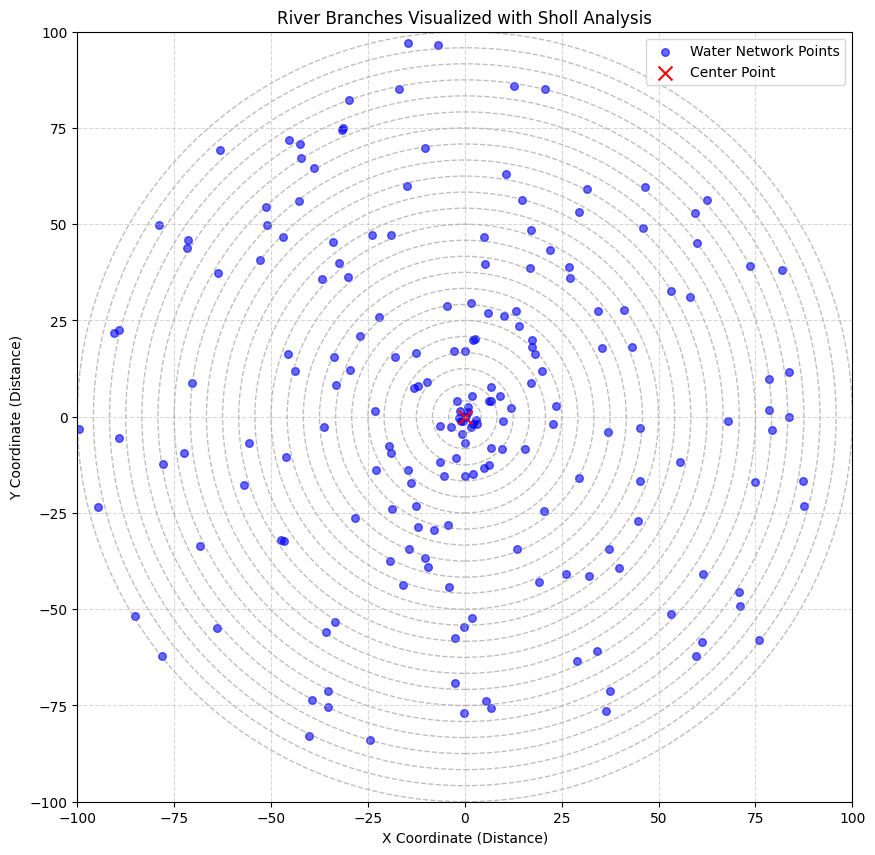

Plot saved as 'network_sholl_analysis.png'


In [23]:
# Parameters for the analysis
num_points = 200  # Number of points in the water network
max_distance = 100  # Maximum distance from the center (e.g., 100 meters)
num_rings = 25  # Number of concentric circles for analysis

# Generate a random water network
network = generate_random_network(num_points, max_distance)

# Perform Sholl Analysis
radii, intersections = sholl_analysis(network, num_rings, max_distance)

# Plot the network with concentric circles
plt.savefig('river_branches_with_sholl.png')
plot_network_with_sholl(network, radii, max_distance, save_path="network_sholl_analysis.png")




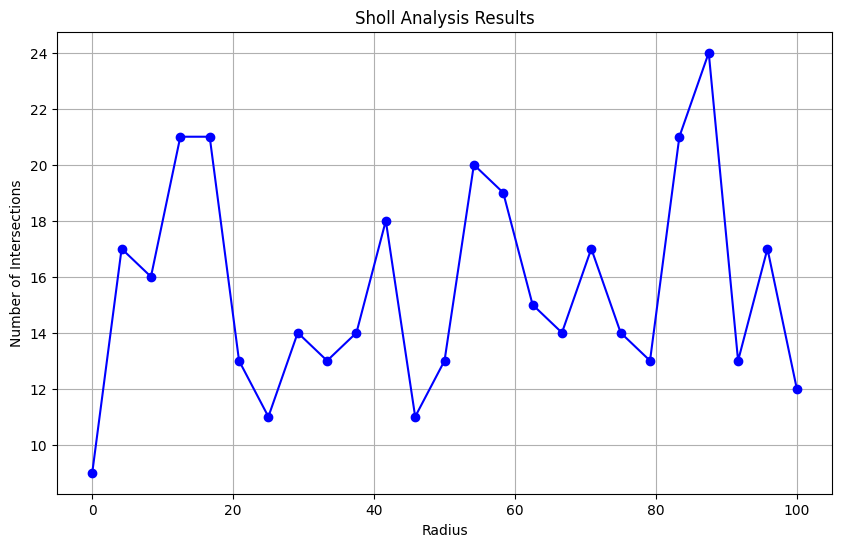

Plot saved as 'sholl_analysis_results.png'


In [21]:

# Example usage
plot_sholl_analysis(radii, intersections, save_path="sholl_analysis_results.png")

In [14]:
# Save the results to an Excel file
results_df = pd.DataFrame({'Radius': radii, 'Intersections': intersections})
results_df.to_excel('sholl_analysis_results.xlsx', index=False)
print("Sholl Analysis results have been saved to 'sholl_analysis_results.xlsx'.")

Sholl Analysis results have been saved to 'sholl_analysis_results.xlsx'.
